In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
# PROBLEM STATEMENT 2.1
# Load the result dataset from previous module
# Plot the closing price of each date

df = pd.read_csv('week2.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,PV,Day_Perc_Change,Trend
0,PVR,EQ,2017-05-15,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,May,2017,1.581266e+08,0.000000,slight or no change
1,PVR,EQ,2017-05-16,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,May,2017,1.331958e+08,0.921342,slight positive
2,PVR,EQ,2017-05-17,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,May,2017,1.130922e+08,-0.565302,slight negative
3,PVR,EQ,2017-05-18,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,May,2017,1.244235e+08,-0.996537,slight negative
4,PVR,EQ,2017-05-19,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,May,2017,1.738918e+08,-0.099007,slight or no change


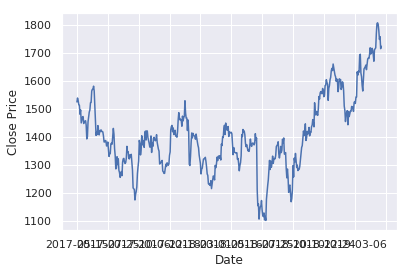

In [4]:
# Plot time series data
g = sns.lineplot(x='Date', y='Close Price', data=df)
g.xaxis.set_major_locator(plt.MaxNLocator(12))

<StemContainer object of 3 artists>

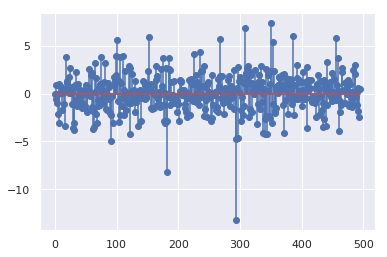

In [5]:
# PROBLEM STATEMENT 2.2
# Plot a stem plot for the daily percent change values

plt.stem(df['Day_Perc_Change'])

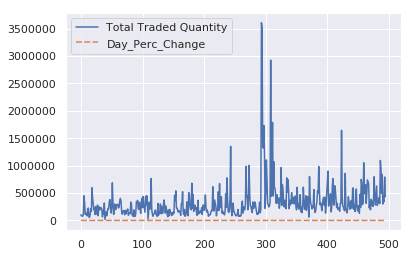

In [6]:
# PROBLEM STATEMENT 2.3
# Compare the volume 

g = sns.lineplot(data=df[['Total Traded Quantity', 'Day_Perc_Change']])
# g.xaxis.set_major_locator(plt.MaxNLocator(12))

[Text(0, 0, 'among top gainers'),
 Text(0, 0, 'among top losers'),
 Text(0, 0, 'bear drop'),
 Text(0, 0, 'bull run'),
 Text(0, 0, 'negative'),
 Text(0, 0, 'positive'),
 Text(0, 0, 'slight negative'),
 Text(0, 0, 'slight or no change'),
 Text(0, 0, 'slight positive')]

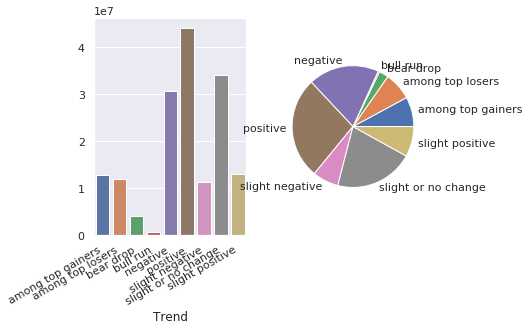

In [7]:
# PROBLEM STATEMENT 2.4
# Plot pie chart and barchart for the Trend column
sums = df.groupby('Trend').sum()['Total Traded Quantity']
fig, axs = plt.subplots(ncols=2)
plt.pie(sums, labels=sums.index)
g = sns.barplot(x=sums.index, y=sums.values, ax=axs[0])
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
# sums.head()
# NOTE : there is only one category in the trend column which is the reason why we see the following figures

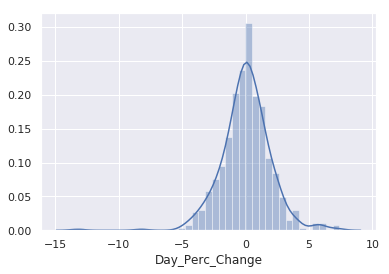

In [8]:
# PROBLEM STATEMENT 2.5
# Plot a histogram for daily percent changes in the stock
sns.distplot(df['Day_Perc_Change'])

/home/anchit/.virtualenvs/ML/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anchit/.virtualenvs/ML/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


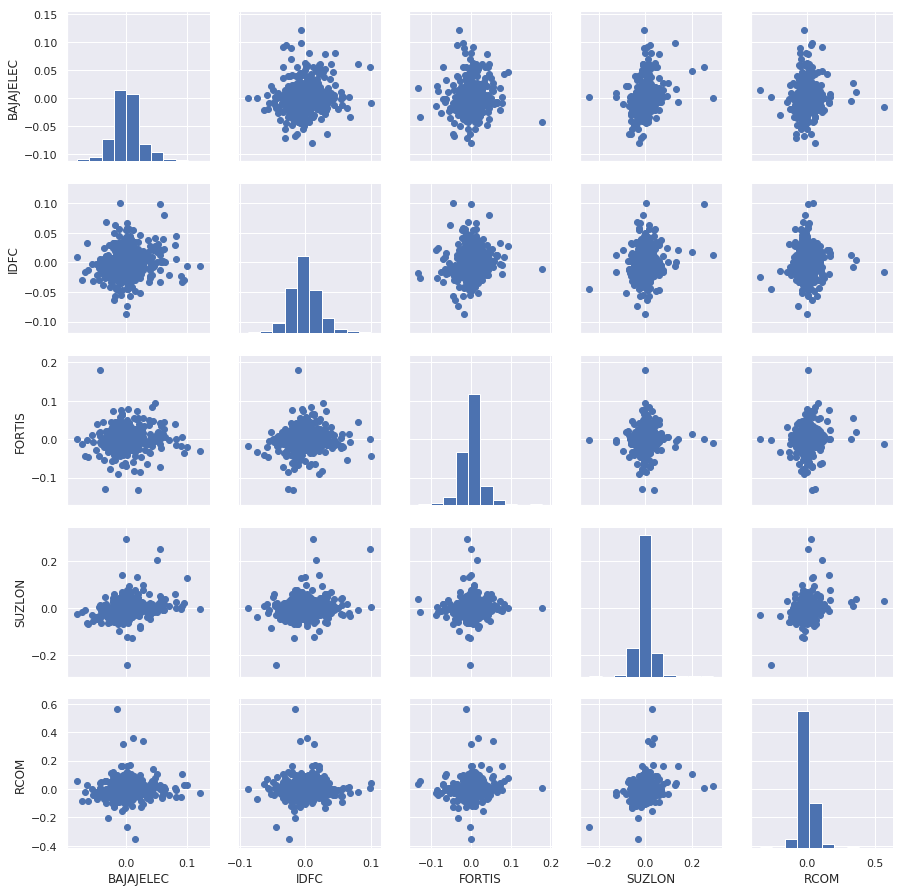

In [9]:
# PROBLEM STATEMENT 2.6
# Load and analyze correlation between 5 random stocks

import os
import random

# Loading the stock
stock_list = ['BAJAJELEC', 'IDFC', 'FORTIS', 'SUZLON', 'RCOM']
stock_dfs = [pd.read_csv('Small_Cap/{0}.csv'.format(stock)) for stock in stock_list]

# Drop rows where series == 'EQ'
for df in stock_dfs:
    df.drop(df[df['Series'] != 'EQ'].index, inplace=True)

# Make new dataframe with the closing price of the selected stocks
df_close_price = pd.DataFrame()
for df in stock_dfs:
    df_close_price = pd.concat([df_close_price, df['Close Price']], axis=1)

# Rename the columns to the respective stock name
df_close_price.columns = stock_list

# Make a new dataframe with daily percentage change in price from the previous dataframe
df_pct_change = df_close_price.pct_change()

# Draw a pair grid plot of the pct_change dataframe
g = sns.PairGrid(df_pct_change, dropna=True)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

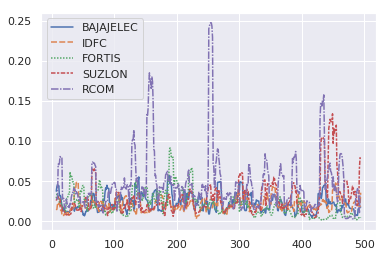

In [10]:
# PROBLEM STATEMENT 2.7
# Plot the std. deviation for the 7-day rolling average of the pct. change dataframe

df_pct_sd = df_pct_change.rolling(7).std()
sns.lineplot(data=df_pct_sd)

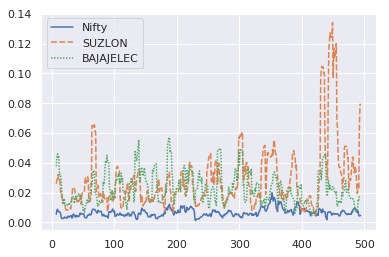

In [11]:
# PROBLEM STATEMENT 2.8
# Calculate the volatility of Nifty and compare it with 2 other stocks

# Append Nifty close price to the previous close price table
nifty_df = pd.read_csv('Nifty50/Nifty50.csv')
df_close_price['Nifty'] = nifty_df['Close']
df_pct_change = df_close_price.pct_change()

# Plot volatitility
sns.lineplot(data=df_pct_change[['Nifty', 'SUZLON', 'BAJAJELEC']].rolling(7).std())

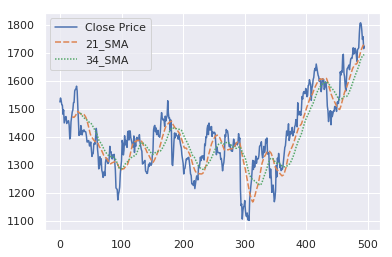

In [12]:
# PROBLEM STATEMENT 2.9
# Make trade calls using 21 and 34-day moving averages

# Load stock and add 21 and 34-day SMA (Simple Moving Average)
df = pd.read_csv('week2.csv')
df['21_SMA'] = df['Close Price'].rolling(21).mean()
df['34_SMA'] = df['Close Price'].rolling(34).mean()

# Plot the averages
sns.lineplot(data=df[['Close Price', '21_SMA', '34_SMA']])

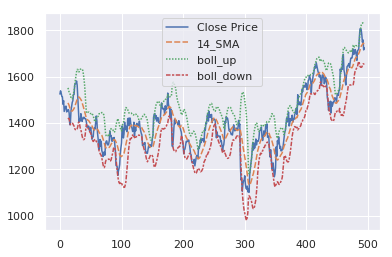

In [13]:
# PROBLEM STATEMENT 2.10
# Make trade calls using Bollinger Bands

# Calculate Bollinger bands
df['14_SMA'] = df['Close Price'].rolling(14).mean()
rolling_std = df['Close Price'].rolling(14).std()
df['boll_up'] = df['14_SMA'] + 2 * rolling_std
df['boll_down'] = df['14_SMA'] - 2 * rolling_std

# Plot the bands
sns.lineplot(data=df[['Close Price', '14_SMA', 'boll_up', 'boll_down']])

In [14]:
# Save the dataframe
df.to_csv('week3.csv', index=False)